### Python based viewer tool for "Probabilistic Reasoning over time", EDAP01 Artificial Intelligence
This notebook, in particular the Dashboard / visualisation, has been originally provided by Alexander Dürr, teaching assistant on the course, spring term 2021. It is based on the ideas and structure of the original Java skeleton for this assignment, provided by Elin A. Topp. Contact me (elin_a.topp at cs.lth.se) in case you need help with the visualisation stuff, it might require some fiddling with Python, Jupyter notebooks, widgets and other thingees!

### Note: Installing and activating widgets for Jupyter Notebook
To be able to display the visualization (dashboard,animations,etc.) you have to initially install the package  if you don't have it yet

### Note: You might also need this for the widgets to work in a notebook (not in Jupyter Lab)
This command enables the widget extension for jupyter notebook 

Menu bar > Help > Launch Classic Notebook

## Visualisation of the underlying models 
### (and example code for visualisation of your own solution)

In _models_, all the actually interesting stuff is located, and in _Filters_ you later write your own core code for filtering / smoothing. Right now, it is only a dummy implementation that returns what is fed into it.

Note that the simulation / visualization (second code cell, "inspecting the models, option 2") assumes to have access to an object of type _Localizer_ which in turn expects the filtering / smoothing to happen in respective methods in _Filters.FilterSmoother_. This also measn, that you can use the visualisation to inspect your tracking / smoothing approach **without changing anything in _Localizer.py_ or _Dashboard.py_**. You can of course use the implementation of the control code for step wise filtering / smoothing in _Localizer.initialise()_ and _Localizer.update()_ as an inspiration for your own implementation.

### Your tasks 1) and 2)

Inspect the **sensor models** given in _models_ with the help of the two ways to visualise them suggested below (or add other visualisations). Prepare yourself to answer the support questions given in the instructions!

## Visualisation as heatmap or simple print-outs


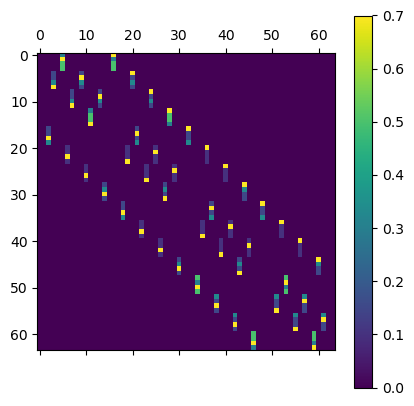

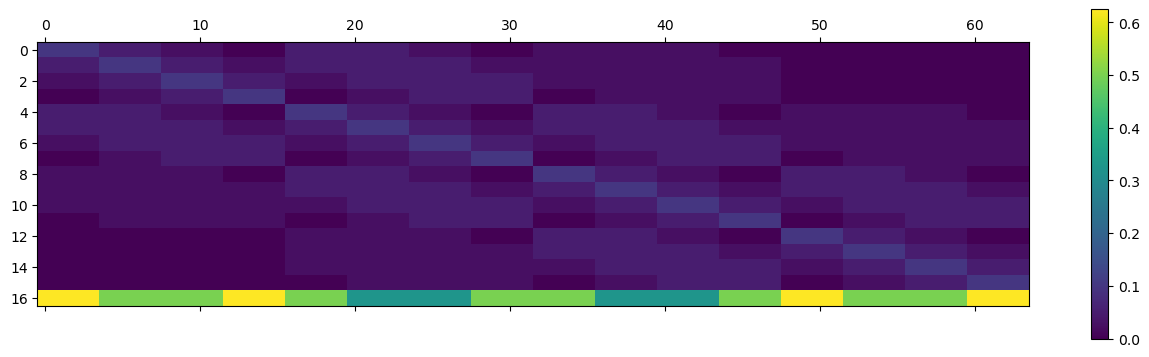

[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.625 0.    0.    ... 0.    0.    0.   ]
 [0.    0.625 0.    ... 0.    0.    0.   ]
 [0.    0.    0.625 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.625 0.    0.   ]
 [0.    0.    0.    ... 0.    0.625 0.   ]
 [0.    0.    0.    ... 0.    0.    0.625]]
(False, 1, 3, 3, -1, -1, 2, 3, 1, array([0.05543237, 0.05543237, 0.05543237, 0.05543237, 0.07206208,
       0.07206208, 0.07206208, 0.07206208, 0.07206208, 0.07206208,
       0.07206208, 0.07206208, 0.05543237, 0.05543237, 0.05543237,
       0.05543237, 0.07206208, 0.07206208, 0.07206208, 0.07206208,
       0.05044346, 0.05044346, 0.05044346, 0.05044346, 0.05044346,
       0.05044346, 0.05044346, 0.05044346, 0.07206208, 0.07206208,
       0.07206208, 0.07206208, 0.07206208, 0.07206208, 0.07206208,
       0.07206208, 0.05044346, 0.05044346

In [1]:
from models import *
from view_control.Localizer import Localizer
import numpy as np

# Testing the models, e.g., for a 4x4 grid

states = StateModel( 4, 4)
loc = Localizer( states, 0, 0) # initialising with sensor model "NUF" (0) and filtering only (windowLength = 0)
tMat = loc.get_transition_model()
sVecs = loc.get_observation_model()
tMat.plot_T() # plotting the T-matrix as heatmap
sVecs.plot_o_diags() # plotting the sensor model as heatmap

print(sVecs.get_o_reading(0)) # print the diagonal matrix for sensor reading "0", i.e. position <0, 0> in the grid
print(sVecs.get_o_reading(None)) # print the diagonal matrix for "no sensor reading"

print(loc.update())

np.set_printoptions(threshold = np.inf)
print(sVecs.sum_diags()) # checking that all probabilities for the sensor readings sum up to 1.0


## Visualisation in the grid-world



In [ ]:
# In view_control.Dashboard, there is simply the handling of all the thread based visualisation provided, 
# no changes needed, but feel free...

# The dashboard creates a state model of the dimensions given by ROWS and COLS, and sets up the respective 
# Transition and Observation models, as well as an instance of class Localizer. The Localizer calls at the 
# moment stubb methods in Filters.FilterSmoother, which just send back the original 
# probability distribution - no filtering / smoothing is actually done. It is your task to implement something 
# useful there in the next step.

from view_control import *

# Default (minimum) size of the grid. Max for visualisation is set to 10, beyond that things get messy
ROWS = 4
COLS = 4

# Non-uniform failure is the default sensor, sensor 0. 
# Default for filtering or smoothing is filtering only (t_minus_k = 0)
sensorType = 0 # NUF-sensor
t_minus_k = 0 # filtering only

dash = Dashboard(ROWS, COLS, sensorType, t_minus_k)
display(dash.db)


Output()